# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Reading in the data from .csv

df = pd.read_csv('Wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Columns description from kaggle:

- Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)
- Region - Lisnon, Oporto or Other (Nominal)
- Fresh - annual spending (m.u.) on fresh products 
- Milk - annual spending (m.u.) on milk products (Continuous)
- Grocery - annual spending (m.u.) on grocery products (Continuous)
- Frozen - annual spending (m.u. on frozen products (Continuous)
- Detergents_Paper - annual spending (m.u.) on detergents and paper products (Continuous)
- Delicassen - annual spending (m.u.) on delicatessen products (Continuous)

In [3]:
# Checking if there are missing values

df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We have only 440 customers in the dataset

In [5]:
# statistical summary with .describe()

df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


It doesn't appear that there are any errors in the data; however, we may have some outliers based on the mean and standard deviation.

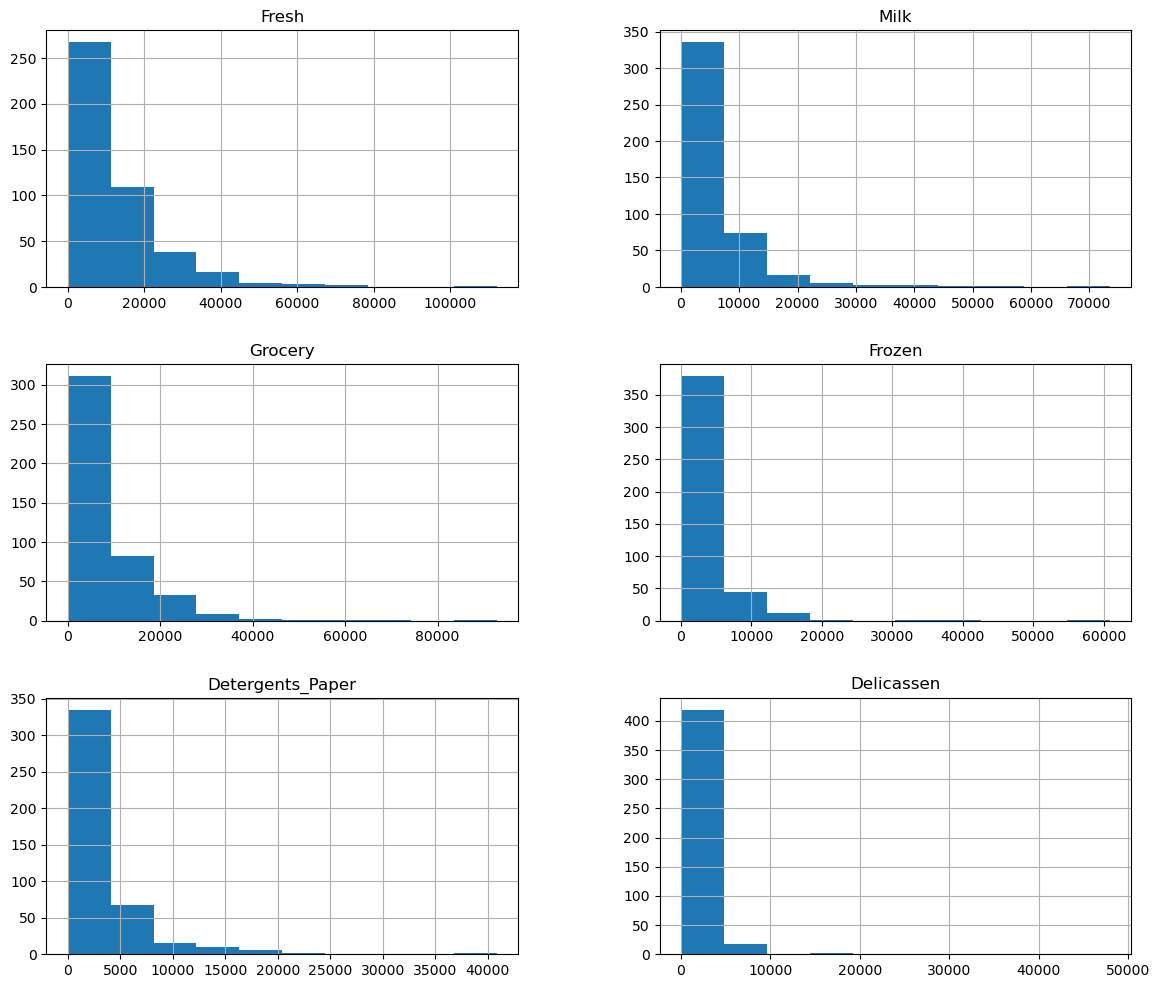

In [6]:
# Histograms

df.hist(column = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], figsize = (14, 12))
plt.show()

We can see that the data is right skewed, and there may be some outliers that need to be addressed later.

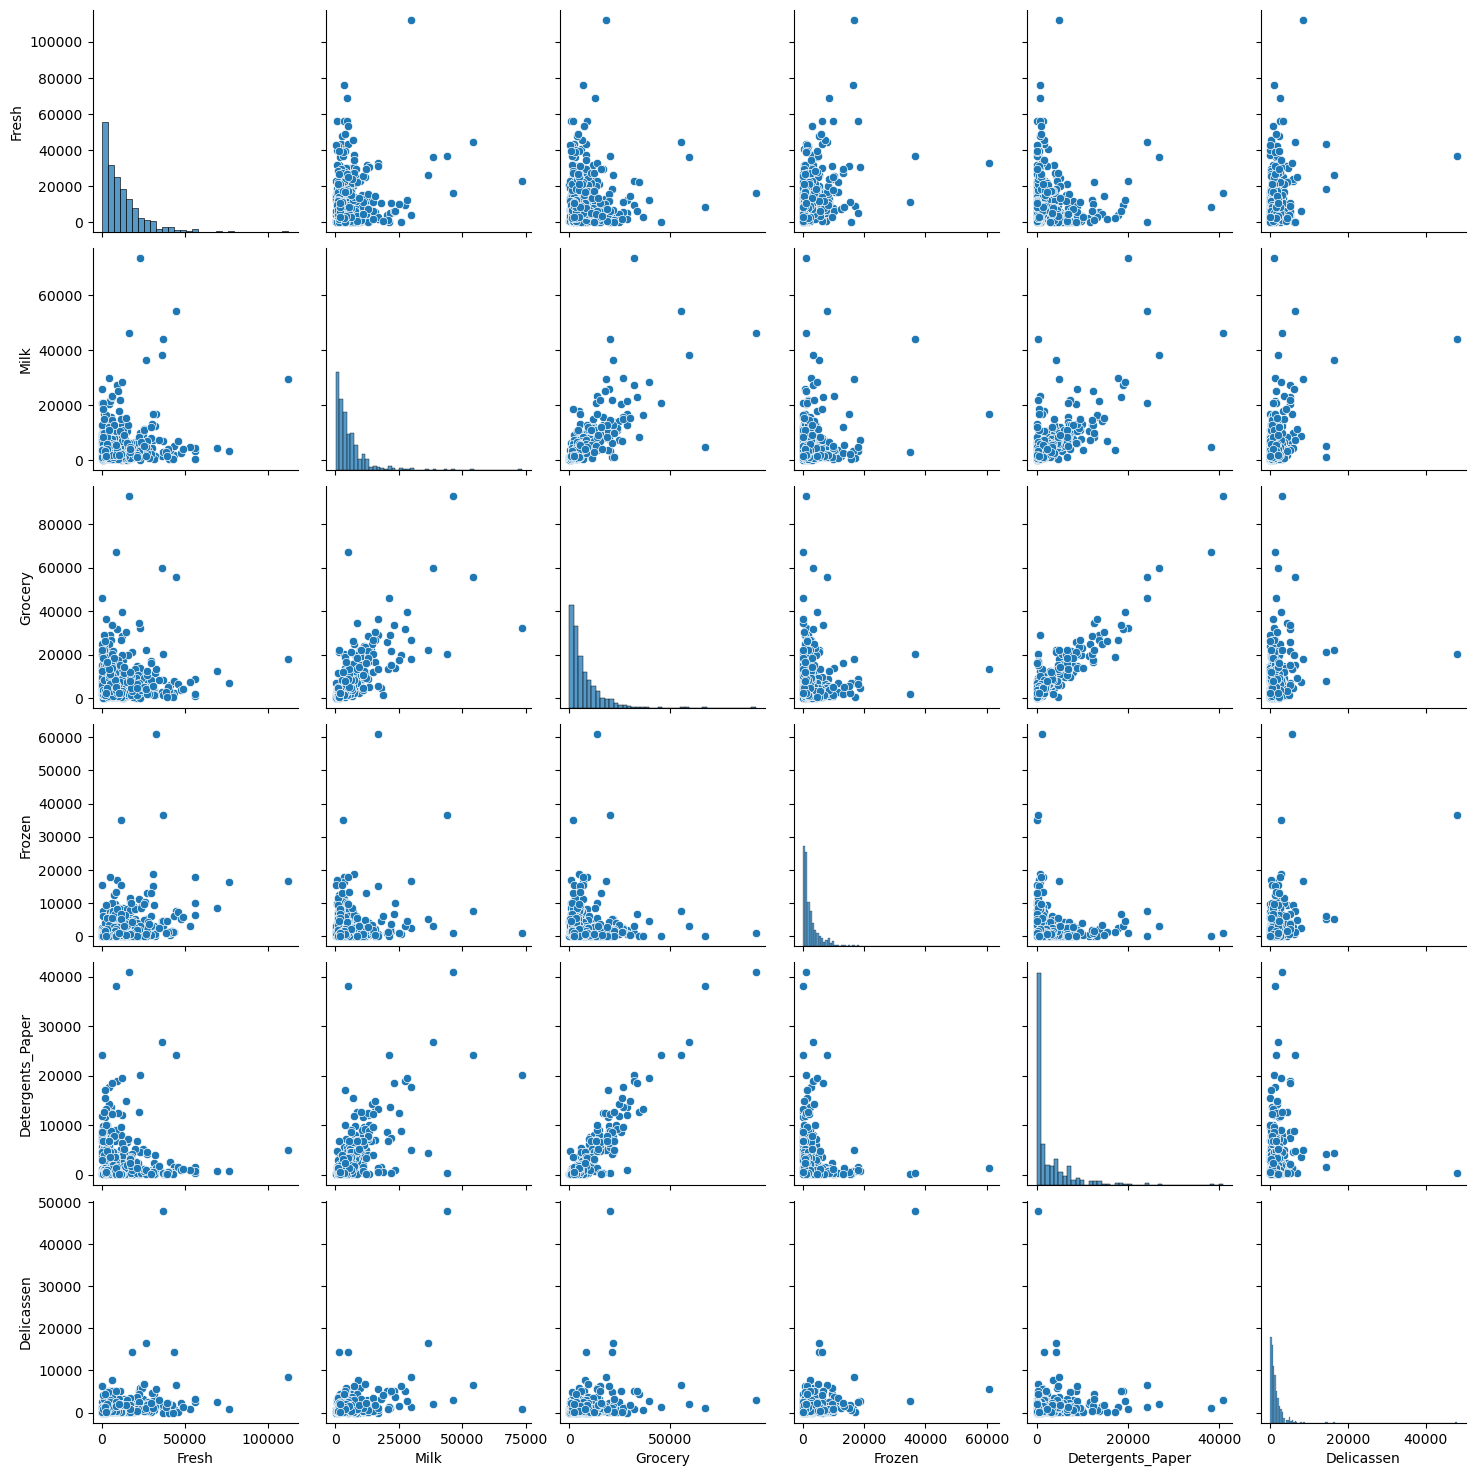

In [7]:
# Scatterplots 

cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
sns.pairplot(df[cols])

We observe a correlation between Grocery and Detergents_Paper, as well as between Milk and Grocery. Additionally, scatterplots confirm the presence of extreme outliers in the dataset.

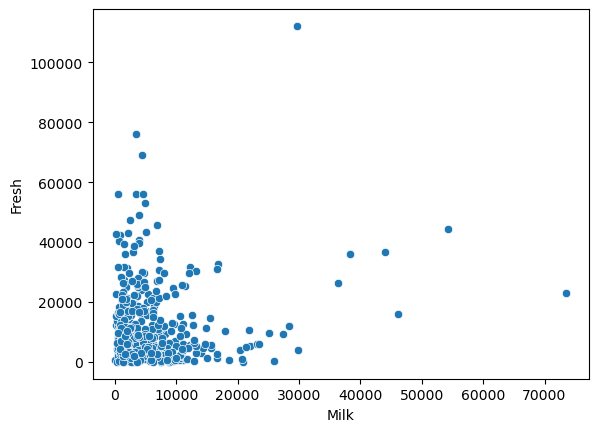

In [8]:
# Scatter plot between 'Milk' and 'Fresh'

sns.scatterplot(data = df, x = 'Milk', y = 'Fresh')
plt.show()

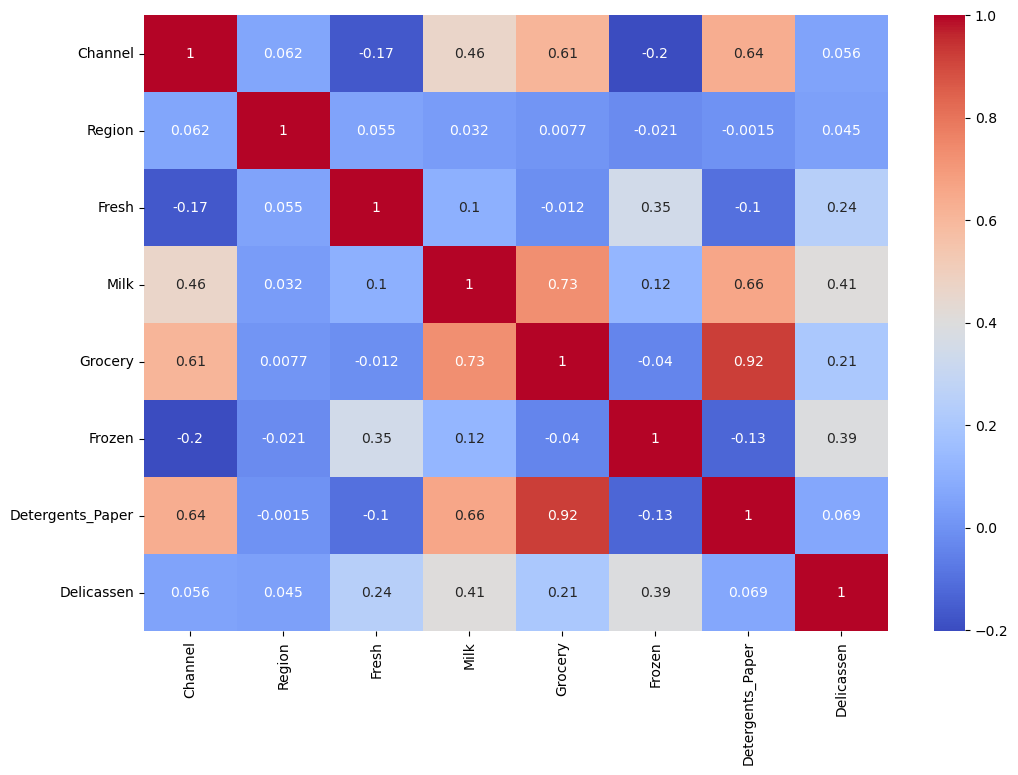

In [9]:
# Heatmap

correlation_matrix = df.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.show()

We observe a strong positive correlation between Grocery and Detergents_Paper, as well as between Milk and Grocery. Additionally, there is a moderately positive correlation between Milk and Detergents_Paper. This suggests that customers are likely to buy these product categories together.

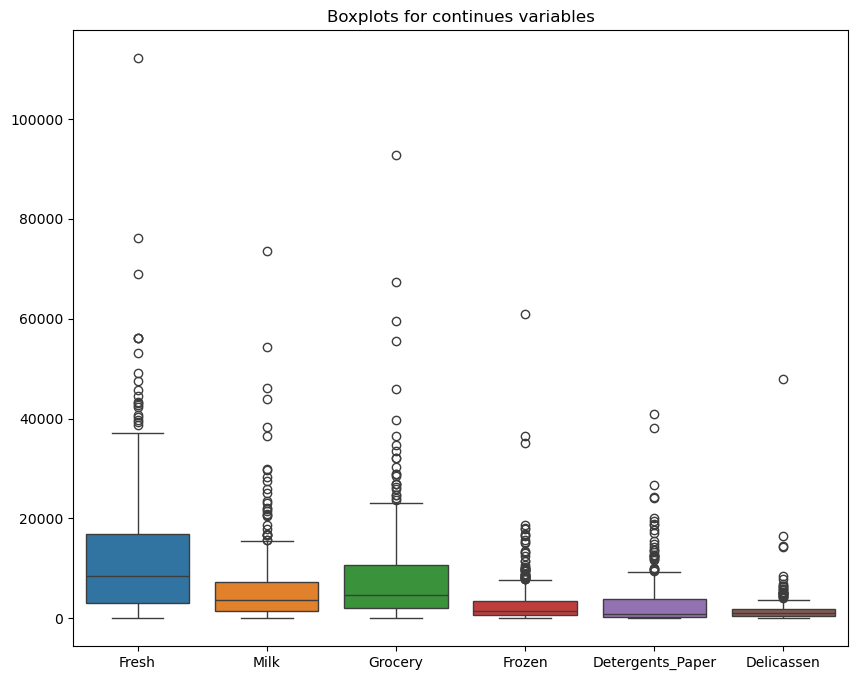

In [10]:
# Boxplots to help see outliers

plt.figure(figsize = (10, 8))
sns.boxplot(data = df.iloc[:,2:])
plt.title('Boxplots for continues variables')
plt.show()

Boxplots easily show outliers that cause skewness in the data. Instead of removing outliers (pretty small dataset), I will cap the extreme ones using Z-scores.

In [11]:
from scipy import stats
# Function to cap outliers based on Z-score
def cap_outliers_zscore(df, threshold=3):
    for col in df.columns:
        z_scores = stats.zscore(df[col])

        # Cap values based on Z-score threshold
        df[col] = np.where(np.abs(z_scores) > threshold, 
                           np.where(z_scores > 0, df[col].quantile(0.95), df[col].quantile(0.05)), 
                           df[col])
    return df

# Cap the outliers
capped_df = cap_outliers_zscore(df)

In [12]:
# Scaling data

scaler = StandardScaler()
x = scaler.fit_transform(capped_df)
scaled_df = pd.DataFrame(x, columns = df.columns)

# Part II - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [13]:
from sklearn.decomposition import PCA

pca = PCA()

pca = pca.fit(scaled_df)

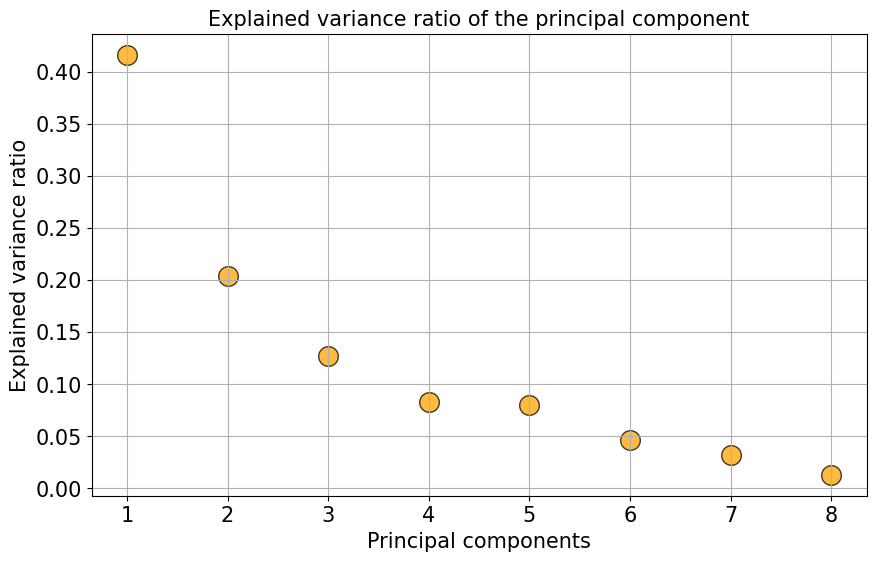

In [14]:
plt.figure(figsize = (10, 6))
plt.scatter(x = [i+1 for i in range(len(pca.explained_variance_ratio_))],
            y = pca.explained_variance_ratio_,
           s = 200, alpha = 0.75, c = 'orange', edgecolor = 'k')
plt.grid(True)
plt.title('Explained variance ratio of the principal component', fontsize = 15)
plt.xlabel('Principal components', fontsize = 15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))], fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Explained variance ratio', fontsize = 15)
plt.show()


In [15]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio 

array([0.41619062, 0.20351471, 0.12686583, 0.08296678, 0.07985027,
       0.04571095, 0.03212884, 0.012772  ])

We can see that PC1 explains a bit over 41% of the variance in the data, while PC2 explains about 20%. Together, they account for approximately 61% of the total variance.

In [16]:
final_df = pca.transform(scaled_df)
final_df = pd.DataFrame(final_df)
final_df = final_df.iloc[:, :2] # I will only keep the first 2 principal components

In [17]:
final_df.head()

,0,1
0,1.173709,-0.385389
1,1.481915,-0.223563
2,2.140234,2.234579
3,-1.298135,0.899946
4,0.954451,2.219602


# Part III - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

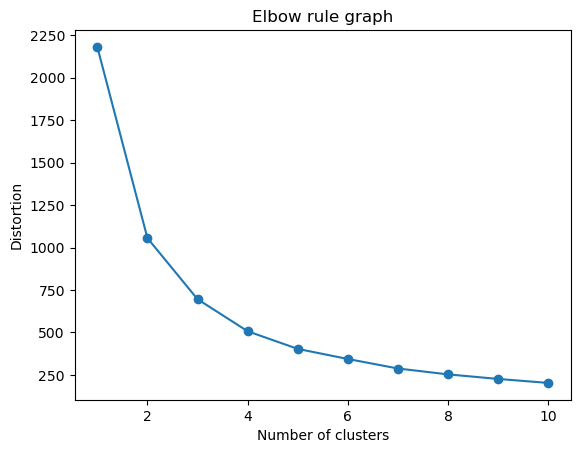

In [18]:
from sklearn.cluster import KMeans

def plot_distortion(data, max_clusters = 10): # Plots the distortions the amount of clusters given
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters = i,
                    n_init = 10,
                    random_state = 42)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(1, max_clusters +1), distortions, marker = 'o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow rule graph')
    plt.show

plot_distortion(final_df)


We can see from the graph above that after 4 clusters, the distortion doesn't drop significantly, and adding more clusters will most likely not improve the fit meaningfully.

In [19]:
# Fit the model

km = KMeans(n_clusters = 4, # how many clusters we expected 
            n_init = 10, # how many initial runs
            random_state = 42)

# fit and predict
y_km = km.fit_predict(final_df)

Unique clusters: {0, 1, 2, 3}
Shape of data: (440, 2)
Cluster 0 has 94 points
Cluster 1 has 219 points
Cluster 2 has 78 points
Cluster 3 has 49 points


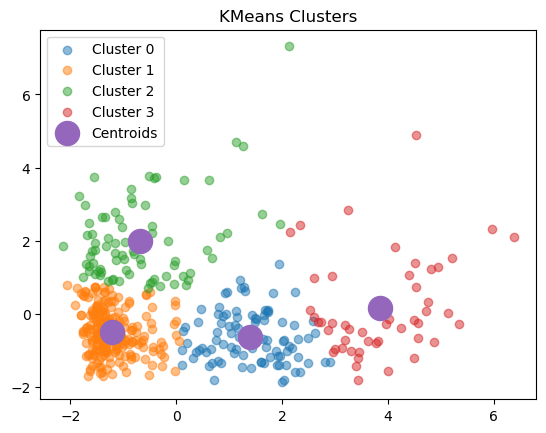

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(data, y_res):  # plots the clusters along with the centroid
    X_centroids = []
    Y_centroids = []

    # Print unique clusters and data shape
    print('Unique clusters:', set(y_res))
    print('Shape of data:', data.shape)

    # Using only the first two columns for plotting
    for cluster in set(y_res):
        x = data[y_res == cluster, 0]
        y = data[y_res == cluster, 1]
        
        # Print number of points in the current cluster
        print(f'Cluster {cluster} has {len(x)} points')

        # Check if there are enough unique values to plot
        if len(x) > 1:
            plt.scatter(x, y, label=f'Cluster {cluster}', alpha = 0.5)
        else:
            print(f'Not enough points to plot for cluster {cluster}')

        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

    plt.scatter(X_centroids, Y_centroids, marker = 'o', s = 300, label = 'Centroids')
    plt.title('KMeans Clusters')
    plt.legend()
    plt.show()

X = final_df.to_numpy()
plot_clusters(X, y_km)

I'd say that 4 clusters are doing a fairly good job overall.

- The clusters are not very clearly defined; while there is some distinction, we also see some overlap at the borders between them.
- Cluster 1 is significantly larger, which might indicate a dominant pattern in the data, while the smaller clusters may represent outlier groups or more unique patterns.
- Clusters 3 and 2 are a bit more spread out, with some possible outliers that might require different handling.


# Part IV - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

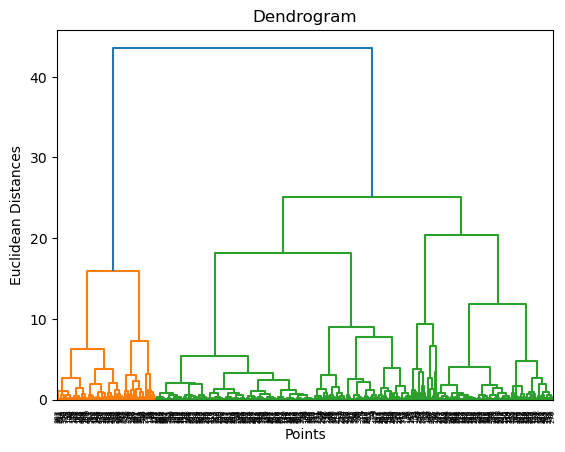

In [21]:
# Cluster hierarchy

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(final_df, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.xlabel('Points')
plt.show()

I would identify 3 or even 4 clusters from this dendrogram. Although it suggests that there are 2 main clusters, we can observe that within the 'green' cluster, there are 2 sub-clusters that merge at a higher height, indicating a larger distance between them. This greater distance suggests that these sub-clusters are more dissimilar from each other and could be treated as separate clusters.

In [22]:
# aglomerative clustering - 2 clusters
from sklearn.cluster import AgglomerativeClustering

# create an object
ac = AgglomerativeClustering(metric = 'euclidean',
                             linkage = 'ward',
                             n_clusters = 2)

Unique clusters: {0, 1}
Shape of data: (440, 2)
Cluster 0 has 353 points
Cluster 1 has 87 points


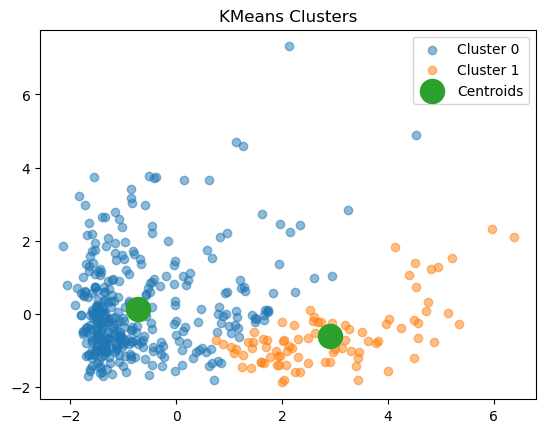

In [23]:
y_hc = ac.fit_predict(final_df)
plot_clusters(X,y_hc)

Unique clusters: {0, 1, 2}
Shape of data: (440, 2)
Cluster 0 has 126 points
Cluster 1 has 87 points
Cluster 2 has 227 points


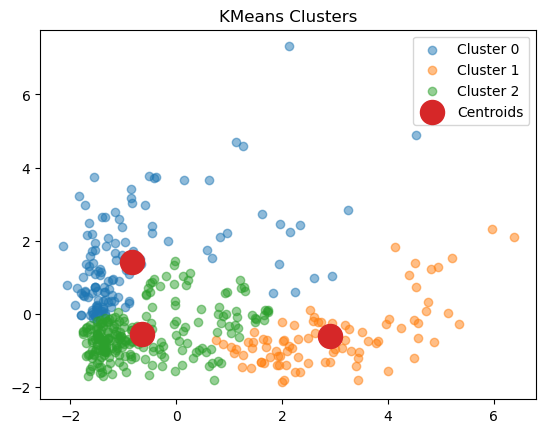

In [24]:
# aglomerative clustering - 3 clusters
from sklearn.cluster import AgglomerativeClustering

# create an object
ac = AgglomerativeClustering(metric = 'euclidean',
                             linkage = 'ward',
                             n_clusters = 3)
y_hc = ac.fit_predict(final_df)
plot_clusters(X,y_hc)

Unique clusters: {0, 1, 2, 3}
Shape of data: (440, 2)
Cluster 0 has 227 points
Cluster 1 has 87 points
Cluster 2 has 103 points
Cluster 3 has 23 points


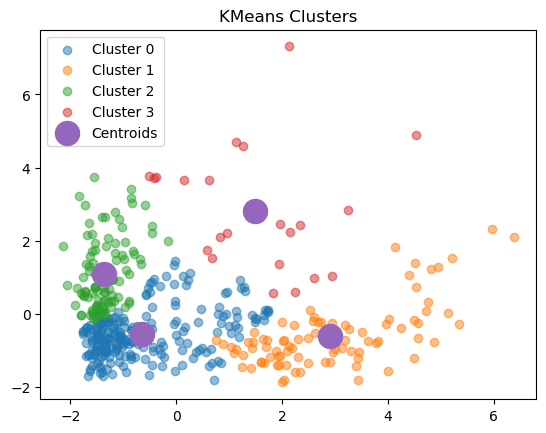

In [25]:
# aglomerative clustering - 4 clusters
from sklearn.cluster import AgglomerativeClustering

# create an object
ac = AgglomerativeClustering(metric = 'euclidean',
                             linkage = 'ward',
                             n_clusters = 4)
y_hc = ac.fit_predict(final_df)
plot_clusters(X,y_hc)

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

EDA:
- The dataset was relatively clean with no missing values; however, outliers were a significant factor during the EDA process. Given the size of the dataset, I chose to cap the outliers to keep these data points while mitigating some of the impact they may have had by keeping them at their original values.
- Observed strong positive correlation products categorized as Grocery and Detergents_Paper, as well as between Milk and Grocery.

PCA:
- The first two principal components account for over 60% of the variance in the data.
- Reducing the number of features helps with visualizing data.

K-Means Clustering:
- Cluster 1 is significantly larger and more densely concentrated around the centroid, indicating a dominant pattern in the data.
- The other clusters are more spread out, suggesting the presence of unique patterns or greater dissimilarity among them.

Hierarchical Clustering:
- When comparing the four clusters from K-Means to those from hierarchical clustering, it appears that the K-Means algorithm does a better job of capturing patterns.
